Jupyter Notebook 正常运行！


E:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23614 (\N{CJK UNIFIED IDEOGRAPH-5C3E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\ANACONDA\Lib\site-packages\I

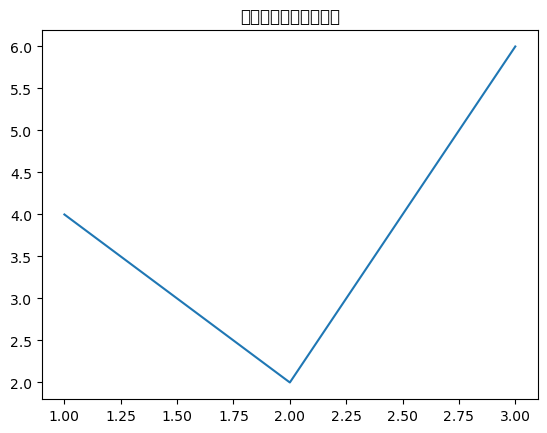

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

print("Jupyter Notebook 正常运行！")

# 示例图
plt.plot([1, 2, 3], [4, 2, 6])
plt.title("测试图：尾流长度趋势")
plt.show()


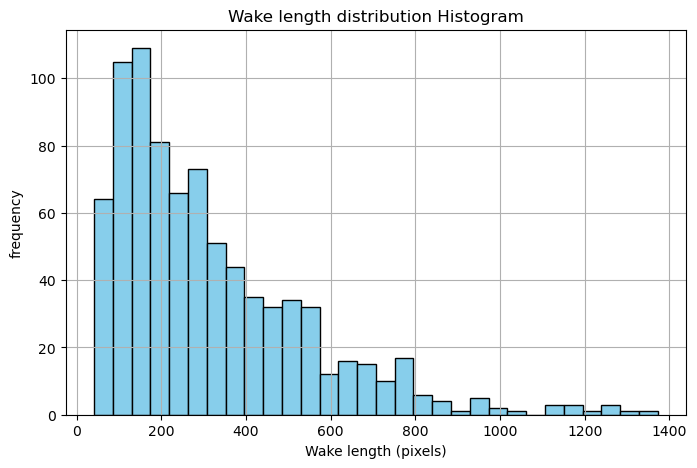

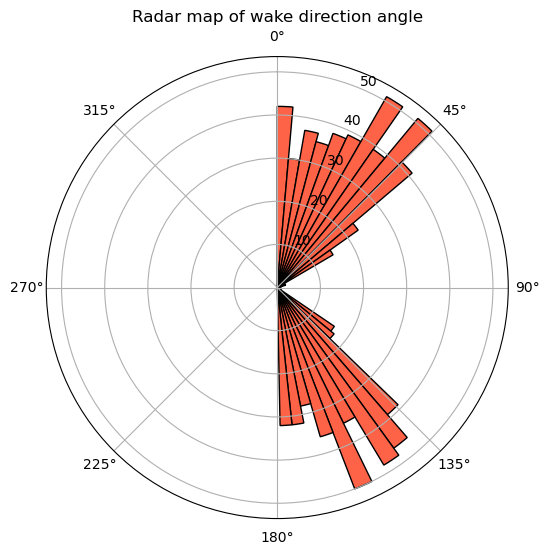

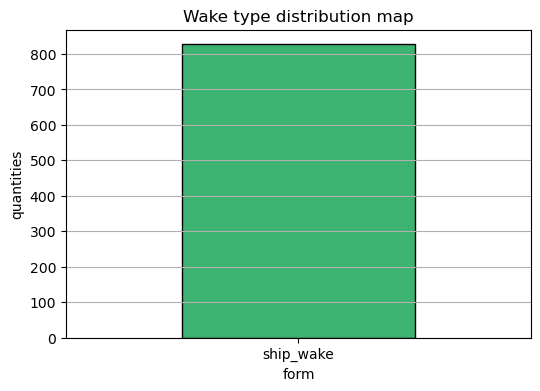

In [2]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import hypot, atan2, degrees

# Step 2: Setting the path
label_dir = r"D:\Master Project\Opensarwake\OpenSARWake_1.0\val\labels"

# Step 3: Reads tags and parses OBB
data = []

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        image_id = filename.replace(".txt", "")
        with open(os.path.join(label_dir, filename), 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 10:
                    # Coordinates of the four corner points
                    x1, y1, x2, y2, x3, y3, x4, y4 = map(float, parts[:8])
                    class_name = parts[8]
                    class_id = int(parts[9])
                    
                    # Calculate both side lengths (opposite sides should be the same length)
                    edge1 = hypot(x2 - x1, y2 - y1)
                    edge2 = hypot(x3 - x2, y3 - y2)
                    length = max(edge1, edge2)
                    
                    # Calculate the direction angle (take the x1->x2 direction)
                    angle_rad = atan2(y2 - y1, x2 - x1)
                    angle_deg = degrees(angle_rad)
                    if angle_deg < 0:
                        angle_deg += 180  # Uniform 0~180°

                    data.append([image_id, length, angle_deg, class_name, class_id])

# Step 4: Building a DataFrame
df = pd.DataFrame(data, columns=["image_id", "length", "angle", "class_name", "class_id"])
df.head()
# Histogram of wake length distribution
plt.figure(figsize=(8, 5))
plt.hist(df['length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Wake length distribution Histogram')
plt.xlabel('Wake length (pixels)')
plt.ylabel('frequency')
plt.grid(True)
plt.show()
# Radar map of wake direction angle
angles_rad = np.deg2rad(df['angle'])

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.hist(angles_rad, bins=36, color='tomato', edgecolor='black')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Radar map of wake direction angle")
plt.show()
# Histogram of tailing category distribution
plt.figure(figsize=(6, 4))
df['class_name'].value_counts().plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Wake type distribution map')
plt.xlabel('form')
plt.ylabel('quantities')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

